# DATA 612 - Project 4
**Derek G. Nokes**

In this project, we build a recommender system for US single stocks based on the transaction data from an equity momentum trading system.

We compare multiple recommender models with the goal of finding a model with a high breadth of items covered, while remaining relatively accurate in terms of predictions.


In [60]:
# analytics
import pandas
import seaborn
# inline matplotlib
%matplotlib inline

## Data

In this section we transform transaction data from an equity momentum trading system to a ratings-like indication of interest in particular single stocks.

First we read the instrument master:

In [61]:
# data can be downloaded here: https://www.dropbox.com/s/of58ol25q6wbogq/SP1500_20-8-120-150-90-14-150_momentum.h5?dl=0
inputDirectory="F:/marketData/global_monitoring/csi/data/equity/strategy/h5/"
#inputFileName="SP1500_20-8-120-150-90-20-40_momentum.h5"
inputFileName="SP1500_20-8-120-150-90-14-150_momentum.h5"
# read the price data from the HDF5 data store
instrumentMaster = pandas.read_hdf(inputDirectory+inputFileName,'instrumentMaster')


In [184]:
instrumentMaster.head()

,mapped_flag,csi_number,instrument_ticker,instrument_name,sector,sedol,isin,index_name,holdings_as_of_date
0,Mapped,5970,MSFT,MICROSOFT CORP,Information Technology,2588173,US5949181045,S&P 500,2019-05-31
1,Mapped,5902,AAPL,APPLE INC,Information Technology,2046251,US0378331005,S&P 500,2019-05-31
2,Mapped,29713,AMZN,AMAZON COM INC,Consumer Discretionary,2000019,US0231351067,S&P 500,2019-05-31
3,Mapped,109201,FB,FACEBOOK CLASS A INC,Communication,B7TL820,US30303M1027,S&P 500,2019-05-31
4,Unmapped,-1,BRKB,BERKSHIRE HATHAWAY INC CLASS B,Financials,2073390,US0846707026,S&P 500,2019-05-31


Next we read in the positions held by instrument and date:

In [4]:
position = pandas.read_hdf(inputDirectory+inputFileName,'position')

In [5]:
position

,0,1,2,3,4,5,6,7,8,9,...,961,962,963,964,965,966,967,968,969,970
asOfDate,,,,,,,,,,,,,,,,,,,,,
2006-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-01-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-01-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-01-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We convert the position to an coarser rating like quantity in the range [-5,+5] where a negative number means the stock will go down and +5 indicates the the stock will go up. Zero indicates that no position has been taken. 

In [9]:
# Sum sign of position [-1,0,+1] over weekly intervals to produce [-5,0,5] rating scale from
# transaction data
implicitRating=numpy.sign(position).resample('W').sum()


For the first instrument, we can see the computed ratings for a particular single stock

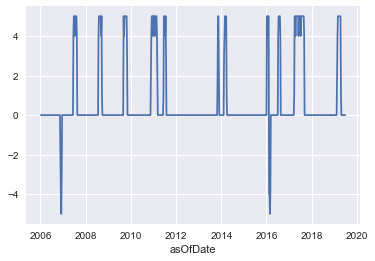

In [215]:
implicitRating[0].plot()

Spikes represent implicit ratings.

We remove periods where there are no implicit ratings

In [10]:
# find non-zero
nonZeroIndex=implicitRating.sum(axis=1)!=0

We plot the mean rating over time.

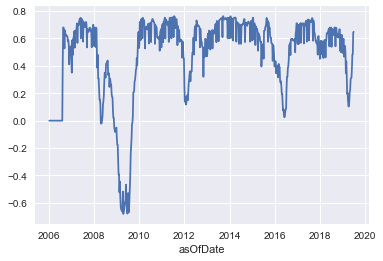

In [11]:
# plot sum of ratings by as-of date
implicitRating.mean(axis=1).plot()

We see that the implicit ratings tend to be negative when the markets are falling and positive when the markets are rising. There is a clear positive bias in the ratings, reflecting the tendency for the equity market to rise over time.

We create a data structure for use feeding our models. 

In [12]:
# extract ratings for non-zero times
ratings=implicitRating.loc[nonZeroIndex]
# drop index/reset
ratings.reset_index(drop=True,inplace=True)
# reset index
df=pandas.DataFrame(ratings.unstack()).reset_index()
# rename columns
df.rename(columns={'level_0' : 'item_id','level_1' : 'user_id',
    0 : 'rating'},inplace=True)


In [14]:
ratings.shape

(673, 971)

In [221]:
ratings.tail()

,0,1,2,3,4,5,6,7,8,9,...,961,962,963,964,965,966,967,968,969,970
668,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
670,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
671,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
672,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We load the data into the requried structure.

In [13]:
# import libraries from Surprise package
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
# Load Reader library
reader = Reader()

# Load ratings dataset with Dataset library
data = Dataset.load_from_df(df[['user_id', 'item_id', 'rating']], reader)


In [22]:
import recmetrics
from surprise import accuracy
from surprise.model_selection import train_test_split
import random
import numpy as np
import pandas as pd

We set the random seed to ensure that our work is reproducible.

In [17]:
randomSeed = 12345678

We split our data into training and test sets.

In [19]:
random.seed(randomSeed)
np.random.seed(randomSeed)

# sample random trainset and testset
# test set is made of 75% of the ratings.
trainset, testset = train_test_split(data, test_size=.75)


We create function to display the cross-validation results of tested models.

In [20]:
# format results table
def formatResults(modelName,modelType,result):
    table=pd.DataFrame(result).T
    columnMapper={0 : 'Fold 1', 1 : 'Fold 2', 2 : 'Fold 3', 
        3 : 'Fold 4', 4 :'Fold 5'}
    rowMapper={'test_rmse' : 'RMSE (testset)', 'test_mae' : 'MAE (testset)',
        'fit_time' : 'Fit time', 'test_time' : 'Test time'}
    table.rename(axis=1,inplace=True,mapper=columnMapper)
    table.rename(axis=0,inplace=True,mapper=rowMapper)
    table['Mean']=table.mean(axis=1)
    table['Std']=table.std(axis=1)
    table['Model']=modelName
    table['Type']=modelType
    table=table[['Model','Type','Mean','Std','Fold 1','Fold 2','Fold 3',
        'Fold 4','Fold 5']].round(4)        
    return table


**Compare the accuracy of at least two recommender system algorithms against your offline data.**


In this section, we perform cross-validation on a number of recommender systems. After we have generated these results, we select a sub-set of the models for further testing.

In [21]:
from surprise import NormalPredictor
from surprise import BaselineOnly
from surprise import SVD
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline

from surprise import Dataset
from surprise.model_selection import cross_validate

In [242]:
random.seed(randomSeed)
np.random.seed(randomSeed)

# use normal algorithm
algo = NormalPredictor()
# Run 5-fold cross-validation and print results
result_UB_NP=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, 
    verbose=True)


Evaluating RMSE, MAE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     1.8218  1.8268  1.8209  1.8254  1.8253  1.8240  0.0023  
RMSE (testset)    2.2158  2.2238  2.2149  2.2199  2.2219  2.2192  0.0034  
Fit time          0.63    0.76    0.76    0.80    0.79    0.75    0.06    
Test time         0.60    0.62    0.62    0.64    0.61    0.62    0.01    


In [256]:
modelName='Normal Predictor'
modelType='User'
table_UB_NP=formatResults(modelName,modelType,result_UB_NP)
table_UB_NP

,Model,Type,Mean,Std,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Fit time,Normal Predictor,User,0.7496,0.0615,0.6300,0.7630,0.7650,0.8020,0.7880
MAE (testset),Normal Predictor,User,1.8240,0.0023,1.8218,1.8268,1.8209,1.8254,1.8253
RMSE (testset),Normal Predictor,User,2.2192,0.0034,2.2158,2.2238,2.2149,2.2199,2.2219
Test time,Normal Predictor,User,0.6176,0.0124,0.6040,0.6160,0.6150,0.6410,0.6120


In [245]:
random.seed(randomSeed)
np.random.seed(randomSeed)

# use baseline algorithm
algo = BaselineOnly()
# Run 5-fold cross-validation and print results
result_UB_B=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, 
    verbose=True)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     1.4696  1.4667  1.4653  1.4677  1.4689  1.4676  0.0015  
RMSE (testset)    1.8616  1.8589  1.8562  1.8590  1.8632  1.8598  0.0024  
Fit time          1.51    1.64    1.67    1.66    1.67    1.63    0.06    
Test time         0.52    0.48    0.55    2.32    0.55    0.88    0.72    


In [246]:
modelName='Baseline Only'
modelType='User'
table_UB_B=formatResults(modelName,modelType,result_UB_B)
table_UB_B

,Model,Type,Mean,Std,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Fit time,Baseline Only,User,1.6300,0.0609,1.5110,1.6380,1.6730,1.6560,1.6720
MAE (testset),Baseline Only,User,1.4676,0.0015,1.4696,1.4667,1.4653,1.4677,1.4689
RMSE (testset),Baseline Only,User,1.8598,0.0024,1.8616,1.8589,1.8562,1.8590,1.8632
Test time,Baseline Only,User,0.8832,0.7168,0.5210,0.4840,0.5460,2.3160,0.5490


In [263]:
random.seed(randomSeed)
np.random.seed(randomSeed)

# compute  similarities between items
sim_options = {'name': 'msd','user_based': True}
# configure model
algo = KNNBasic(sim_options=sim_options)
# compute RMSE and MAE using 5-fold cross validation
result_UB_KNN_M=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [265]:
modelName='KNN Basic (MSD)'
modelType='User'
table_UB_KNN_M=formatResults(modelName,modelType,result_UB_KNN_M)
table_UB_KNN_M

,Model,Type,Mean,Std,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Fit time,KNN Basic (MSD),User,9.8420,0.1271,9.6490,10.0200,9.7690,9.9220,9.8500
MAE (testset),KNN Basic (MSD),User,1.3425,0.0016,1.3441,1.3416,1.3401,1.3427,1.3441
RMSE (testset),KNN Basic (MSD),User,1.6352,0.0029,1.6361,1.6349,1.6308,1.6347,1.6397
Test time,KNN Basic (MSD),User,49.9736,1.0210,47.9720,50.0980,50.5970,50.5130,50.6880


In [266]:
random.seed(randomSeed)
np.random.seed(randomSeed)

# use cosine similarity
# compute similarities between items
sim_options = {'name': 'cosine','user_based': True}
# configure model
algo = KNNBasic(sim_options=sim_options)
# compute RMSE and MAE using 5-fold cross validation
result_UB_KNN_C=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [267]:
modelName='KNN Basic (Cosine)'
modelType='User'
table_UB_KNN_C=formatResults(modelName,modelType,result_UB_KNN_C)
table_UB_KNN_C

,Model,Type,Mean,Std,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Fit time,KNN Basic (Cosine),User,13.9578,0.0432,14.0000,14.0150,13.9140,13.9500,13.9100
MAE (testset),KNN Basic (Cosine),User,1.3385,0.0017,1.3402,1.3375,1.3357,1.3387,1.3402
RMSE (testset),KNN Basic (Cosine),User,1.6213,0.0031,1.6224,1.6207,1.6167,1.6208,1.6261
Test time,KNN Basic (Cosine),User,46.5676,1.0650,44.7820,48.1330,46.6870,46.5370,46.6990


In [268]:
random.seed(randomSeed)
np.random.seed(randomSeed)

# use pearson similarity
# compute similarities between items
sim_options = {'name': 'pearson','user_based': True}
# configure model
algo = KNNBasic(sim_options=sim_options)
# compute RMSE and MAE using 5-fold cross validation
result_UB_KNN_P=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [269]:
modelName='KNN Basic (Pearson)'
modelType='User'
table_UB_KNN_P=formatResults(modelName,modelType,result_UB_KNN_P)
table_UB_KNN_P

,Model,Type,Mean,Std,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Fit time,KNN Basic (Pearson),User,15.8586,0.1947,15.4880,15.8490,16.0050,16.0160,15.9350
MAE (testset),KNN Basic (Pearson),User,1.3061,0.0016,1.3075,1.3051,1.3036,1.3061,1.3081
RMSE (testset),KNN Basic (Pearson),User,1.5780,0.0032,1.5786,1.5774,1.5736,1.5771,1.5836
Test time,KNN Basic (Pearson),User,48.3130,1.7369,44.9200,48.7600,49.8010,48.8240,49.2600


In [270]:
random.seed(randomSeed)
np.random.seed(randomSeed)

# use pearson baseline similarity
# compute similarities between items
sim_options = {'name': 'pearson_baseline','shrinkage' : 100,'user_based': True}
# configure model
algo = KNNBasic(sim_options=sim_options)
# compute RMSE and MAE using 5-fold cross validation
result_UB_KNN_PB=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [271]:
modelName='KNN Basic (Pearson Baseline - Shrinkage)'
modelType='User'
table_UB_KNN_PB=formatResults(modelName,modelType,result_UB_KNN_PB)
table_UB_KNN_PB

,Model,Type,Mean,Std,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Fit time,KNN Basic (Pearson Baseline - Shrinkage),User,37.6484,0.2424,37.4150,38.1150,37.5470,37.5470,37.6180
MAE (testset),KNN Basic (Pearson Baseline - Shrinkage),User,1.2955,0.0016,1.2967,1.2945,1.2932,1.2953,1.2977
RMSE (testset),KNN Basic (Pearson Baseline - Shrinkage),User,1.5645,0.0033,1.5646,1.5639,1.5603,1.5632,1.5703
Test time,KNN Basic (Pearson Baseline - Shrinkage),User,48.0006,0.4721,47.6180,47.7780,48.3890,47.4990,48.7190


In [272]:
random.seed(randomSeed)
np.random.seed(randomSeed)

# use pearson baseline similarity
# no shrinkage
# compute similarities between items
sim_options = {'name': 'pearson_baseline','shrinkage' : 0,'user_based': True}
# configure model
algo = KNNBasic(sim_options=sim_options)
# compute RMSE and MAE using 5-fold cross validation
result_UB_KNN_PBN=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [273]:
modelName='KNN Basic (Pearson Baseline - No Shrinkage)'
modelType='User'
table_UB_KNN_PBN=formatResults(modelName,modelType,result_UB_KNN_PBN)
table_UB_KNN_PBN

,Model,Type,Mean,Std,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Fit time,KNN Basic (Pearson Baseline - No Shrinkage),User,37.7696,0.2944,37.3640,37.9690,37.5870,38.2090,37.7190
MAE (testset),KNN Basic (Pearson Baseline - No Shrinkage),User,1.2955,0.0016,1.2967,1.2945,1.2932,1.2953,1.2977
RMSE (testset),KNN Basic (Pearson Baseline - No Shrinkage),User,1.5645,0.0033,1.5646,1.5639,1.5603,1.5632,1.5703
Test time,KNN Basic (Pearson Baseline - No Shrinkage),User,47.3150,1.2458,45.1110,47.7680,47.4580,47.2870,48.9510


In [274]:
random.seed(randomSeed)
np.random.seed(randomSeed)

# compute  similarities between items
sim_options = {'name': 'msd','user_based': True}
# configure model
algo = KNNWithMeans(sim_options=sim_options)
# compute RMSE and MAE using 5-fold cross validation
result_UB_KNNM_M=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [275]:
modelName='KNN With Means (MSD)'
modelType='User'
table_UB_KNNM_M=formatResults(modelName,modelType,result_UB_KNNM_M)
table_UB_KNNM_M

,Model,Type,Mean,Std,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Fit time,KNN With Means (MSD),User,9.6982,0.0462,9.6280,9.7470,9.7160,9.6610,9.7390
MAE (testset),KNN With Means (MSD),User,1.3409,0.0015,1.3425,1.3399,1.3387,1.3410,1.3425
RMSE (testset),KNN With Means (MSD),User,1.6299,0.0028,1.6308,1.6294,1.6257,1.6292,1.6344
Test time,KNN With Means (MSD),User,47.8762,0.4272,48.2580,48.3260,47.8910,47.7740,47.1320


In [276]:
random.seed(randomSeed)
np.random.seed(randomSeed)

# compute  similarities between items
sim_options = {'name': 'msd','user_based': True}
# configure model
algo = KNNWithMeans(sim_options=sim_options)
# compute RMSE and MAE using 5-fold cross validation
result_UB_KNNM_C=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [277]:
modelName='KNN With Means (Cosine)'
modelType='User'
table_UB_KNNM_C=formatResults(modelName,modelType,result_UB_KNNM_C)
table_UB_KNNM_C

,Model,Type,Mean,Std,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Fit time,KNN With Means (Cosine),User,9.7642,0.2454,9.4240,9.6630,9.6670,9.9320,10.1350
MAE (testset),KNN With Means (Cosine),User,1.3409,0.0015,1.3425,1.3399,1.3387,1.3410,1.3425
RMSE (testset),KNN With Means (Cosine),User,1.6299,0.0028,1.6308,1.6294,1.6257,1.6292,1.6344
Test time,KNN With Means (Cosine),User,49.6418,2.9356,46.6020,47.0250,48.2280,53.1260,53.2280


In [278]:
random.seed(randomSeed)
np.random.seed(randomSeed)

# use pearson similarity
# compute similarities between items
sim_options = {'name': 'pearson','user_based': True}
# configure model
algo = KNNWithMeans(sim_options=sim_options)
# compute RMSE and MAE using 5-fold cross validation
result_UB_KNNM_P=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [279]:
modelName='KNN With Means (Pearson)'
modelType='User'
table_UB_KNNM_P=formatResults(modelName,modelType,result_UB_KNNM_P)
table_UB_KNNM_P

,Model,Type,Mean,Std,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Fit time,KNN With Means (Pearson),User,16.6770,0.2761,16.1830,16.9610,16.6090,16.7350,16.8970
MAE (testset),KNN With Means (Pearson),User,1.3062,0.0015,1.3075,1.3050,1.3040,1.3063,1.3082
RMSE (testset),KNN With Means (Pearson),User,1.5770,0.0032,1.5773,1.5762,1.5728,1.5762,1.5826
Test time,KNN With Means (Pearson),User,52.3936,0.9455,52.4800,52.9790,53.7430,51.0250,51.7410


In [280]:
random.seed(randomSeed)
np.random.seed(randomSeed)

# use pearson baseline similarity
# compute similarities between items
sim_options = {'name': 'pearson_baseline','shrinkage' : 100,'user_based': True}
# configure model
algo = KNNWithMeans(sim_options=sim_options)
# compute RMSE and MAE using 5-fold cross validation
result_UB_KNNM_PB=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [281]:
modelName='KNN With Means (Pearson Baseline - No Shrinkage)'
modelType='User'
table_UB_KNNM_PB=formatResults(modelName,modelType,result_UB_KNNM_PB)
table_UB_KNNM_PB

,Model,Type,Mean,Std,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Fit time,KNN With Means (Pearson Baseline - No Shrinkage),User,38.9816,0.2858,38.8170,39.0410,38.7600,39.5160,38.7740
MAE (testset),KNN With Means (Pearson Baseline - No Shrinkage),User,1.2952,0.0015,1.2964,1.2941,1.2932,1.2951,1.2973
RMSE (testset),KNN With Means (Pearson Baseline - No Shrinkage),User,1.5629,0.0032,1.5629,1.5622,1.5588,1.5617,1.5687
Test time,KNN With Means (Pearson Baseline - No Shrinkage),User,50.9628,0.8083,51.9010,51.2760,50.1590,51.6170,49.8610


In [282]:
random.seed(randomSeed)
np.random.seed(randomSeed)

# use pearson baseline similarity
# no shrinkage
# compute similarities between items
sim_options = {'name': 'pearson_baseline','shrinkage' : 0,'user_based': True}
# configure model
algo = KNNWithMeans(sim_options=sim_options)
# compute RMSE and MAE using 5-fold cross validation
result_UB_KNNM_PBN=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [283]:
modelName='KNN With Means (Pearson Baseline - Shrinkage)'
modelType='User'
table_UB_KNNM_PBN=formatResults(modelName,modelType,result_UB_KNNM_PBN)
table_UB_KNNM_PBN

,Model,Type,Mean,Std,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Fit time,KNN With Means (Pearson Baseline - Shrinkage),User,38.9386,0.1156,39.0190,38.9840,39.0440,38.9240,38.7220
MAE (testset),KNN With Means (Pearson Baseline - Shrinkage),User,1.2952,0.0015,1.2964,1.2942,1.2932,1.2951,1.2973
RMSE (testset),KNN With Means (Pearson Baseline - Shrinkage),User,1.5629,0.0032,1.5629,1.5622,1.5589,1.5617,1.5687
Test time,KNN With Means (Pearson Baseline - Shrinkage),User,50.8522,0.9993,51.1050,52.3140,51.3120,49.4360,50.0940


In [284]:
random.seed(randomSeed)
np.random.seed(randomSeed)

# compute  similarities between items
sim_options = {'name': 'msd','user_based': True}
# configure model
algo = KNNWithZScore(sim_options=sim_options)
# compute RMSE and MAE using 5-fold cross validation
result_UB_KNNZ_M=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [285]:
modelName='KNN With Z-Score (MSD)'
modelType='User'
table_UB_KNNZ_M=formatResults(modelName,modelType,result_UB_KNNZ_M)
table_UB_KNNZ_M

,Model,Type,Mean,Std,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Fit time,KNN With Z-Score (MSD),User,10.3008,0.0563,10.2400,10.3850,10.2660,10.3500,10.2630
MAE (testset),KNN With Z-Score (MSD),User,1.3416,0.0015,1.3432,1.3404,1.3395,1.3417,1.3430
RMSE (testset),KNN With Z-Score (MSD),User,1.6268,0.0028,1.6278,1.6261,1.6226,1.6262,1.6313
Test time,KNN With Z-Score (MSD),User,51.0238,0.4951,51.8170,50.9620,50.9060,50.2750,51.1590


In [286]:
random.seed(randomSeed)
np.random.seed(randomSeed)

# compute  similarities between items
sim_options = {'name': 'cosine','user_based': True}
# configure model
algo = KNNWithZScore(sim_options=sim_options)
# compute RMSE and MAE using 5-fold cross validation
result_UB_KNNZ_C=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [287]:
modelName='KNN With Z-Score (Cosine)'
modelType='User'
table_UB_KNNZ_C=formatResults(modelName,modelType,result_UB_KNNZ_C)
table_UB_KNNZ_C


,Model,Type,Mean,Std,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Fit time,KNN With Z-Score (Cosine),User,15.0188,0.2514,14.7390,15.4850,14.8840,15.0130,14.9730
MAE (testset),KNN With Z-Score (Cosine),User,1.3408,0.0015,1.3425,1.3397,1.3385,1.3410,1.3422
RMSE (testset),KNN With Z-Score (Cosine),User,1.6210,0.0029,1.6221,1.6203,1.6167,1.6205,1.6256
Test time,KNN With Z-Score (Cosine),User,51.8052,0.6613,51.9340,51.2050,51.6780,51.2060,53.0030


In [288]:
random.seed(randomSeed)
np.random.seed(randomSeed)

# use pearson similarity
# compute similarities between items
sim_options = {'name': 'pearson','user_based': True}
# configure model
algo = KNNWithZScore(sim_options=sim_options)
# compute RMSE and MAE using 5-fold cross validation
result_UB_KNNZ_P=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [289]:
modelName='KNN With Z-Score (Pearson)'
modelType='User'
table_UB_KNNZ_P=formatResults(modelName,modelType,result_UB_KNNZ_P)
table_UB_KNNZ_P


,Model,Type,Mean,Std,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Fit time,KNN With Z-Score (Pearson),User,16.7704,0.1700,16.5100,16.8020,17.0200,16.8410,16.6790
MAE (testset),KNN With Z-Score (Pearson),User,1.3068,0.0014,1.3082,1.3056,1.3048,1.3068,1.3086
RMSE (testset),KNN With Z-Score (Pearson),User,1.5745,0.0031,1.5750,1.5738,1.5704,1.5736,1.5799
Test time,KNN With Z-Score (Pearson),User,51.1740,0.2816,50.8140,51.1960,50.8970,51.4990,51.4640


In [290]:
random.seed(randomSeed)
np.random.seed(randomSeed)

# use pearson baseline similarity
# compute similarities between items
sim_options = {'name': 'pearson_baseline','shrinkage' : 100,'user_based': True}
# configure model
algo = KNNWithZScore(sim_options=sim_options)
# compute RMSE and MAE using 5-fold cross validation
result_UB_KNNZ_PB=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [291]:
modelName='KNN With Z-Score (Pearson Baseline - Shrinkage)'
modelType='User'
table_UB_KNNZ_PB=formatResults(modelName,modelType,result_UB_KNNZ_PB)
table_UB_KNNZ_PB

,Model,Type,Mean,Std,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Fit time,KNN With Z-Score (Pearson Baseline - Shrinkage),User,39.1364,0.2620,38.9300,39.6300,38.9360,39.0120,39.1740
MAE (testset),KNN With Z-Score (Pearson Baseline - Shrinkage),User,1.2956,0.0014,1.2969,1.2946,1.2938,1.2954,1.2975
RMSE (testset),KNN With Z-Score (Pearson Baseline - Shrinkage),User,1.5602,0.0031,1.5604,1.5596,1.5562,1.5590,1.5658
Test time,KNN With Z-Score (Pearson Baseline - Shrinkage),User,51.3052,0.2667,51.2090,50.8680,51.3160,51.6630,51.4700


In [292]:
random.seed(randomSeed)
np.random.seed(randomSeed)

# use pearson baseline similarity
# no shrinkage
# compute similarities between items
sim_options = {'name': 'pearson_baseline','shrinkage' : 0,'user_based': True}
# configure model
algo = KNNWithZScore(sim_options=sim_options)
# compute RMSE and MAE using 5-fold cross validation
result_UB_KNNZ_PBN=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [293]:
modelName='KNN With Z-Score (Pearson Baseline - No Shrinkage)'
modelType='User'
table_UB_KNNZ_PBN=formatResults(modelName,modelType,result_UB_KNNZ_PBN)
table_UB_KNNZ_PBN

,Model,Type,Mean,Std,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Fit time,KNN With Z-Score (Pearson Baseline - No Shrink...,User,39.6020,0.9362,38.5760,38.9860,40.8890,40.5640,38.9950
MAE (testset),KNN With Z-Score (Pearson Baseline - No Shrink...,User,1.2957,0.0014,1.2969,1.2946,1.2938,1.2955,1.2975
RMSE (testset),KNN With Z-Score (Pearson Baseline - No Shrink...,User,1.5602,0.0031,1.5604,1.5596,1.5562,1.5590,1.5658
Test time,KNN With Z-Score (Pearson Baseline - No Shrink...,User,54.8450,2.4304,53.1890,51.6760,58.8150,54.7140,55.8310


In [294]:
random.seed(randomSeed)
np.random.seed(randomSeed)

# compute  similarities between items
sim_options = {'name': 'msd','user_based': True}
# configure model
algo = KNNBaseline(sim_options=sim_options)
# compute RMSE and MAE using 5-fold cross validation
result_UB_KNNB_M=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


In [295]:
modelName='KNN Baseline (MSD)'
modelType='User'
table_UB_KNNB_M=formatResults(modelName,modelType,result_UB_KNNB_M)
table_UB_KNNB_M

,Model,Type,Mean,Std,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Fit time,KNN Baseline (MSD),User,11.9238,0.5371,11.4160,11.6390,12.1430,12.8780,11.5430
MAE (testset),KNN Baseline (MSD),User,1.3409,0.0015,1.3425,1.3399,1.3387,1.3410,1.3425
RMSE (testset),KNN Baseline (MSD),User,1.6300,0.0028,1.6309,1.6295,1.6258,1.6293,1.6345
Test time,KNN Baseline (MSD),User,57.0204,2.7020,54.2470,56.4360,60.8720,59.3730,54.1740


In [296]:
random.seed(randomSeed)
np.random.seed(randomSeed)

# compute  similarities between items
sim_options = {'name': 'cosine','user_based': True}
# configure model
algo = KNNBaseline(sim_options=sim_options)
# compute RMSE and MAE using 5-fold cross validation
result_UB_KNNB_C=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [297]:
modelName='KNN Baseline (Cosine)'
modelType='User'
table_UB_KNNB_C=formatResults(modelName,modelType,result_UB_KNNB_C)
table_UB_KNNB_C

,Model,Type,Mean,Std,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Fit time,KNN Baseline (Cosine),User,16.3342,0.1866,16.1520,16.1280,16.3250,16.6310,16.4350
MAE (testset),KNN Baseline (Cosine),User,1.3397,0.0016,1.3414,1.3387,1.3372,1.3400,1.3414
RMSE (testset),KNN Baseline (Cosine),User,1.6228,0.0030,1.6237,1.6221,1.6184,1.6224,1.6277
Test time,KNN Baseline (Cosine),User,53.8260,0.7326,53.2550,53.3720,54.7570,53.0730,54.6730


In [298]:
random.seed(randomSeed)
np.random.seed(randomSeed)

# use pearson similarity
# compute similarities between items
sim_options = {'name': 'pearson','user_based': True}
# configure model
algo = KNNBaseline(sim_options=sim_options)
# compute RMSE and MAE using 5-fold cross validation
result_UB_KNNB_P=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [299]:
modelName='KNN Baseline (Pearson)'
modelType='User'
table_UB_KNNB_P=formatResults(modelName,modelType,result_UB_KNNB_P)
table_UB_KNNB_P

,Model,Type,Mean,Std,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Fit time,KNN Baseline (Pearson),User,17.9236,0.0987,18.0500,17.9260,17.7740,18.0050,17.8630
MAE (testset),KNN Baseline (Pearson),User,1.3062,0.0016,1.3075,1.3050,1.3039,1.3062,1.3082
RMSE (testset),KNN Baseline (Pearson),User,1.5770,0.0032,1.5773,1.5762,1.5728,1.5762,1.5826
Test time,KNN Baseline (Pearson),User,52.9780,0.7308,52.8500,54.3080,52.4860,53.0650,52.1810


In [300]:
random.seed(randomSeed)
np.random.seed(randomSeed)

# use pearson baseline similarity
# compute similarities between users
sim_options = {'name': 'pearson_baseline','shrinkage' : 100,'user_based': True}
# configure model
algo = KNNBaseline(sim_options=sim_options)
# compute RMSE and MAE using 5-fold cross validation
result_UB_KNNB_PB=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [301]:
modelName='KNN Baseline (Pearson Baseline) - Shrinkage'
modelType='User'
table_UB_KNNB_PB=formatResults(modelName,modelType,result_UB_KNNB_PB)
table_UB_KNNB_PB

,Model,Type,Mean,Std,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Fit time,KNN Baseline (Pearson Baseline) - Shrinkage,User,38.8444,0.1581,38.7280,38.7820,38.6870,38.8980,39.1270
MAE (testset),KNN Baseline (Pearson Baseline) - Shrinkage,User,1.2952,0.0015,1.2964,1.2941,1.2932,1.2950,1.2973
RMSE (testset),KNN Baseline (Pearson Baseline) - Shrinkage,User,1.5629,0.0032,1.5629,1.5622,1.5589,1.5617,1.5687
Test time,KNN Baseline (Pearson Baseline) - Shrinkage,User,53.4044,0.9630,52.4720,53.2400,55.2620,53.0320,53.0160


In [302]:
random.seed(randomSeed)
np.random.seed(randomSeed)

# use pearson baseline similarity
# no shrinkage
# compute similarities between items
sim_options = {'name': 'pearson_baseline','shrinkage' : 0,'user_based': True}
# configure model
algo = KNNBaseline(sim_options=sim_options)
# compute RMSE and MAE using 5-fold cross validation
result_UB_KNNB_PBN=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [303]:
modelName='KNN Baseline (Pearson Baseline) - No Shrinkage'
modelType='User'
table_UB_KNNB_PBN=formatResults(modelName,modelType,result_UB_KNNB_PBN)
table_UB_KNNB_PBN


,Model,Type,Mean,Std,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Fit time,KNN Baseline (Pearson Baseline) - No Shrinkage,User,38.7276,0.4370,38.4980,38.5130,39.5990,38.5660,38.4620
MAE (testset),KNN Baseline (Pearson Baseline) - No Shrinkage,User,1.2952,0.0015,1.2964,1.2941,1.2932,1.2951,1.2973
RMSE (testset),KNN Baseline (Pearson Baseline) - No Shrinkage,User,1.5629,0.0032,1.5629,1.5622,1.5589,1.5617,1.5687
Test time,KNN Baseline (Pearson Baseline) - No Shrinkage,User,53.3582,0.8810,52.3810,52.6790,54.8340,53.0810,53.8160


In [304]:
random.seed(randomSeed)
np.random.seed(randomSeed)

# use SVD algorithm
algo = SVD()

# Run 5-fold cross-validation and print results
result_UB_SVD=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, 
    verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     1.1823  1.1843  1.1822  1.1833  1.1857  1.1836  0.0013  
RMSE (testset)    1.4395  1.4444  1.4382  1.4395  1.4491  1.4421  0.0041  
Fit time          21.67   23.18   22.19   22.46   22.15   22.33   0.50    
Test time         0.76    0.79    0.74    0.83    0.76    0.77    0.03    


In [305]:
modelName='SVD (Default)'
modelType='User'
table_UB_SVD=formatResults(modelName,modelType,result_UB_SVD)
table_UB_SVD

,Model,Type,Mean,Std,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Fit time,SVD (Default),User,22.3334,0.4953,21.6740,23.1830,22.1940,22.4650,22.1510
MAE (testset),SVD (Default),User,1.1836,0.0013,1.1823,1.1843,1.1822,1.1833,1.1857
RMSE (testset),SVD (Default),User,1.4421,0.0041,1.4395,1.4444,1.4382,1.4395,1.4491
Test time,SVD (Default),User,0.7738,0.0293,0.7560,0.7850,0.7450,0.8260,0.7570


In [309]:
table_UB=pd.concat([table_UB_NP,table_UB_B,table_UB_KNN_M,
    table_UB_KNN_C,table_UB_KNN_P,table_UB_KNN_PB,
    table_UB_KNNM_M,table_UB_KNNM_C,table_UB_KNNM_P,
    table_UB_KNNM_PB,table_UB_KNNM_PBN,table_UB_KNNZ_M,
    table_UB_KNNZ_C,table_UB_KNNZ_P,table_UB_KNNZ_PB,
    table_UB_KNNZ_PBN,table_UB_KNNB_M,table_UB_KNNB_C,
    table_UB_KNNB_P,table_UB_KNNB_PB,table_UB_KNNB_PBN,
    table_UB_SVD])

In [310]:
RMSE_UB=table_UB[['Model','Mean','Std','Fold 1','Fold 2','Fold 3',
    'Fold 4','Fold 5']].loc['RMSE (testset)'].round(4)

We summarize the cross-validated accuracy of the models tested in the following table.

In [311]:
RMSE_UB.sort_values(by='Mean')

,Model,Mean,Std,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
RMSE (testset),SVD (Default),1.4421,0.0041,1.4395,1.4444,1.4382,1.4395,1.4491
RMSE (testset),KNN With Z-Score (Pearson Baseline - No Shrink...,1.5602,0.0031,1.5604,1.5596,1.5562,1.5590,1.5658
RMSE (testset),KNN With Z-Score (Pearson Baseline - Shrinkage),1.5602,0.0031,1.5604,1.5596,1.5562,1.5590,1.5658
RMSE (testset),KNN Baseline (Pearson Baseline) - Shrinkage,1.5629,0.0032,1.5629,1.5622,1.5589,1.5617,1.5687
RMSE (testset),KNN Baseline (Pearson Baseline) - No Shrinkage,1.5629,0.0032,1.5629,1.5622,1.5589,1.5617,1.5687
RMSE (testset),KNN With Means (Pearson Baseline - No Shrinkage),1.5629,0.0032,1.5629,1.5622,1.5588,1.5617,1.5687
RMSE (testset),KNN With Means (Pearson Baseline - Shrinkage),1.5629,0.0032,1.5629,1.5622,1.5589,1.5617,1.5687
RMSE (testset),KNN Basic (Pearson Baseline - Shrinkage),1.5645,0.0033,1.5646,1.5639,1.5603,1.5632,1.5703
RMSE (testset),KNN With Z-Score (Pearson),1.5745,0.0031,1.5750,1.5738,1.5704,1.5736,1.5799
RMSE (testset),KNN With Means (Pearson),1.5770,0.0032,1.5773,1.5762,1.5728,1.5762,1.5826


From the list of models tested, we select the 'SVD (Default)', 'KNN With Z-Score (Pearson Baseline - Shrinkage)' and 'Baseline Only' models for further testing related to coverage.

**Implement support for at least one business or user experience goal such as increased serendipity, novelty, or diversity.**

In our application, we want our users to perceive our recommendations as covering a large universe of single stocks.

We will investigate the recommended single stocks as a proportion of the total available instrument universe using a measure commonly referred to as 'catalogue coverage'.

Different coverage metrics are available to quantify 1) the degree to which recommendations cover the set of available items, and 2) the degree to which recommendations can be generated for all potential users. The percentage of the available items effectively available to be recommended to a user is referred to as 'catalogue coverage'. A recommender with high catalogue coverage provides a broader coverage of the entire product space than a recommender with lower catalogue coverage.

Unfortunately, accuracy is generally inversely related to catalogue coverage, and thus, higher catalogue coverage is generally achieved with a correspondingly lower accuracy.


## Catalogue Coverage

In this section, we compute the catalogue coverage for a selection of our recommender system models and examine the relationship between accuracy and coverage.

In [26]:
def get_users_predictions(user_id, n, model):
    recommended_items = pd.DataFrame(model.loc[user_id])
    recommended_items.columns = ["predicted_rating"]
    recommended_items = recommended_items.sort_values('predicted_rating', ascending=False)    
    recommended_items = recommended_items.head(n)
    return recommended_items.index.tolist()

### Baseline Only

In [49]:
# use baseline algorithm
algo = BaselineOnly()
algo.fit(trainset)
#
test = algo.test(testset)
test = pd.DataFrame(test)
test.drop("details", inplace=True, axis=1)
test.columns = ['userId', 'itemId', 'actual', 'cf_predictions']
#
rmse_baseline=recmetrics.rmse(test.actual, test.cf_predictions)
# pivit data for processing
cf_model_baseline = test.pivot_table(index='userId', columns='itemId', 
    values='cf_predictions').fillna(0)
test = test.copy().groupby('userId')['itemId'].agg({'actual': (lambda x: list(set(x)))})
# make recommendations for all members in test data
recs = []
for user in test.index:
    cf_predictions_baseline = get_users_predictions(user, 10, cf_model_baseline)
    recs.append(cf_predictions_baseline)
# add recommendations
test['cf_predictions_baseline'] = recs
# covert actual to list
actual = test.actual.values.tolist()
# convert predictions to list
cf_predictions_baseline = test.cf_predictions_baseline.values.tolist()
# create catalog list
catalog = df.item_id.unique().tolist()
# compute coverage
cf_coverage_baseline = recmetrics.coverage(cf_predictions_baseline, catalog)


Estimating biases using als...


C:\Users\Derek\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [50]:
cf_coverage_baseline

14.21

### KNN

In [51]:
# use pearson baseline similarity
# compute similarities between users
sim_options = {'name': 'pearson_baseline','shrinkage' : 100,'user_based': True}
# configure model
algo = KNNBaseline(sim_options=sim_options)
algo.fit(trainset)
#
test = algo.test(testset)
test = pd.DataFrame(test)
test.drop("details", inplace=True, axis=1)
test.columns = ['userId', 'itemId', 'actual', 'cf_predictions']
#
rmse_knn=recmetrics.rmse(test.actual, test.cf_predictions)
# pivit data for processing
cf_model_knn = test.pivot_table(index='userId', columns='itemId', 
    values='cf_predictions').fillna(0)
test = test.copy().groupby('userId')['itemId'].agg({'actual': (lambda x: list(set(x)))})
# make recommendations for all members in test data
recs = []
for user in test.index:
    cf_predictions_knn = get_users_predictions(user, 10, cf_model_knn)
    recs.append(cf_predictions_knn)
# add recommendations
test['cf_predictions_knn'] = recs
# covert actual to list
actual = test.actual.values.tolist()
# convert predictions to list
cf_predictions_knn = test.cf_predictions_knn.values.tolist()
# create catalog list
catalog = df.item_id.unique().tolist()
# compute coverage
cf_coverage_knn = recmetrics.coverage(cf_predictions_knn, catalog)


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


C:\Users\Derek\Anaconda2\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


In [45]:
cf_coverage_knn


62.72

### SVD

In [52]:
algo = SVD()
algo.fit(trainset)

test = algo.test(testset)
test = pd.DataFrame(test)
test.drop("details", inplace=True, axis=1)
test.columns = ['userId', 'itemId', 'actual', 'cf_predictions']
#
rmse_svd=recmetrics.rmse(test.actual, test.cf_predictions)
#
cf_model_svd = test.pivot_table(index='userId', columns='itemId', values='cf_predictions').fillna(0)
#
test = test.copy().groupby('userId')['itemId'].agg({'actual': (lambda x: list(set(x)))})
#make recommendations for all members in the test data
recs = []
for user in test.index:
    cf_predictions_svd = get_users_predictions(user, 10, cf_model_svd)
    recs.append(cf_predictions_svd)
        
test['cf_predictions_svd'] = recs
#
actual = test.actual.values.tolist()
#
cf_predictions_svd = test.cf_predictions_svd.values.tolist()
# create catalog list
catalog = df.item_id.unique().tolist()
# model 3
cf_coverage_svd = recmetrics.coverage(cf_predictions_svd, catalog)

C:\Users\Derek\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  del sys.path[0]


In [44]:
cf_coverage_svd

73.22

**Compare and report on any change in accuracy before and after you’ve made the change in #2.**

In the figure below, we can see that the coverage of the SVD model exceeds that of both the Baseline-Only and KNN models:

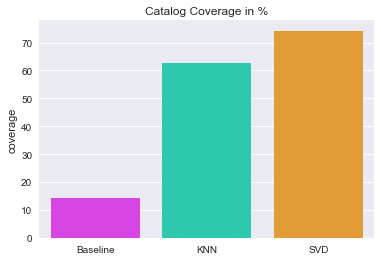

In [53]:
coverage_scores = [cf_coverage_baseline,cf_coverage_knn,cf_coverage_svd]
model_names = ['Baseline','KNN','SVD']

fig = plt.figure(figsize=(6, 4))
recmetrics.coverage_plot(coverage_scores, model_names)

A higher value indicates a greater percentage of the items were included in the recommendation space.


In [58]:
RMSE_table=[rmse_baseline,rmse_knn,rmse_svd]
pd.DataFrame(data=RMSE_table,index=['Baseline Only','KNN','SVD'],columns=['RMSE'])

,RMSE
Baseline Only,1.859586
KNN,1.764445
SVD,1.766348


Although the root mean squared error (RMSE) on the test set is slightly higher for the KNN model, the SVD accuracy is very close. We select the SVD model with a slightly lower accuracy in order to boost our catalogue coverage.

## Conclusion

**Discuss one or more additional experiments that could be performed and/or metrics that could be evaluated only if online evaluation was possible.**

Although we can evaluate our different recommender systems using offline data, we may also be interested in measuring the change in user behavior based on interactions with different recommendation engines. To observe these behavioral differences, we can do online testing. We can randomly redirect a small set of our user traffic to each of the different recommenders and record their interactions with the recommender. As the costs of such testing is generally high, we attempt to determine as much as possible from our offline testing. 

**Briefly propose how you would design a reasonable online evaluation environment.**

Our online evaluation environment would fix the interface and change only the underlying recommendation engine providing recommendations. Random sampling would be applied so that we can isolate the effect of changes to our recommender system one A/B test at a time.

# Appendex - Theory

In this section we include the theory (outlined in previous projects submitted this semester) behind the selected models.

## Notation Summary
Throughout this project we employ the following notation:

$R$ represents the set of all ratings.

$R_{train}$ is the training set.

$R_{test}$ is the test set.

$\hat{R}$ is the set of predicted ratings.

The set of all users $U$ is composed of pairs of users $u$ and $v$.

The set of all items $I$ is composed of pairs of items $i$ and $j$.

$U_{i}$ indicates the set of all users that have rated item $i$.

$U_{ij}$ indicates the set of all users that have rated both items $i$ and $j$.

$I_{u}$ is the set of all items rated by user $u$.

$I_{uv}$ denotes the set of all items rated by users $u$ and $v$.

$r_{ui}$ represents the true rating of user $u$ for item $i$.

$\hat{r}_{ui}$ is the estimated rating of user $u$ for item $i$.

$b_{ui}$ is the baseline rating of user $u$ for item $i$.

$\mu$ is the mean of all ratings.

$\mu_{u}$ is the mean of all ratings given by user $u$.

$\mu_{i}$ is the mean of all ratings given to item $i$.

$\sigma_{u}$ is the standard deviation of all ratings given by user $u$.

$\sigma_{i}$ is the standard deviation of all ratings given to item $i$.

$N_{i}^{k}(u)$ denotes the $k$ nearest neighbors of user $u$ that have rated item $i$.

$N_{u}^{k}(i)$ represents the $k$ nearest neighbors of item $i$ that have been rated by user $u$.

$\text{sim(u,v)}$ metric measuring the similarity between users $u$ and $v$

$\text{sim(i,i)}$ metric measuring the similarity between items $i$ and $j$

## Similarity Metrics
In the application sections below, we compare the results of several recommendation algorithms for a number of different similarity metrics:

### Cosine Similarity

#### User-Based:
$$\text{cosine_sim}(u, v)=\frac{\sum_{i \in I_{uv}} r_{ui} \cdot r_{vi}}{\sqrt{\sum_{i \in I_{uv}} r_{ui}^2}\cdot\sqrt{\sum_{i \in I_{uv}} r_{vi}^2}}$$

#### Item-Based:
$$\text{cosine_sim}(i, j)=\frac{\sum_{u \in U_{ij}} r_{ui} \cdot r_{uj}}{\sqrt{\sum_{u \in U_{ij}} r_{ui}^2}\cdot\sqrt{\sum_{u \in U_{ij}} r_{uj}^2}}$$

### Mean Squared Difference (MSD)
We compute the Mean Squared Difference (MSD) similarity between all pairs of users (or items) as follows:
For common users (or items), the Mean Squared Difference is defined as:

#### User-Based:
$$\text{msd}(u, v) = \frac{1}{|I_{uv}|} \cdot \sum_{i \in I_{uv}} (r_{ui} - r_{vi})^2$$

User=based MSD-similarity is defined as:

$$\text{msd_sim}(u, v) = \frac{1}{\text{msd}(u, v) + 1}$$

where +1 is used to ensure that we do not divide by zero.

#### Item-Based:
$$\text{msd}(i, j) = \frac{1}{|U_{ij}|} \cdot \sum_{u \in U_{ij}} (r_{ui} - r_{uj})^2$$

Item-based MSD-similarity is defined as:

$$\text{msd_sim}(i, j) = \frac{1}{\text{msd}(i, j) + 1}$$

### Pearson Correlation Coefficient
For common users (or items), the Pearson Correlation coefficient is computed between all pairs of users (or items) and is defined as:

#### User-Based:
$$\text{pearson_sim}(u, v) = \frac{ \sum_{i \in I_{uv}}(r_{ui} -  \mu_u) \cdot (r_{vi} - \mu_{v})} {\sqrt{\sum_{i \in I_{uv}} (r_{ui} - \mu_u)^2} \cdot \sqrt{\sum_{i \in I_{uv}} (r_{vi} -  \mu_{v})^2} }$$

Similarity will be zero if there are no common users (or items).

#### Item-Based:
$$\text{pearson_sim}(i, j) = \frac{ \sum_{u \in U_{ij}}(r_{ui} -  \mu_i) \cdot (r_{uj} - \mu_{j})} {\sqrt{\sum_{u \in U_{ij}} (r_{ui} - \mu_i)^2} \cdot \sqrt{\sum_{u \in U_{ij}} (r_{uj} - \mu_{j})^2} }$$

### Pearson-Baseline Correlation Coefficient

#### User-Based:
$$\text{pearson_baseline_sim}(u, v) = \hat{\rho}_{uv} = \frac{ \sum_{i \in I_{uv}} (r_{ui} -  b_{ui}) \cdot (r_{vi} - b_{vi})} {\sqrt{\sum_{i \in I_{uv}} (r_{ui} -  b_{ui})^2} \cdot \sqrt{\sum_{i \in I_{uv}} (r_{vi} -  b_{vi})^2}}$$

#### Item-Based:
$$\text{pearson_baseline_sim}(i, j) = \hat{\rho}_{ij} = \frac{ \sum_{u \in U_{ij}} (r_{ui} -  b_{ui}) \cdot (r_{uj} - b_{uj})} {\sqrt{\sum_{u \in U_{ij}} (r_{ui} -  b_{ui})^2} \cdot \sqrt{\sum_{u \in U_{ij}} (r_{uj} -  b_{uj})^2}}$$

### Pearson-Baseline Correlation With Shrinkage
To reduce overfitting when only a few ratings are available, we can use shrinkage.
The Pearson correlation coefficient with shrinkage is computed between all pairs of users (or items) centered using baselines instead of means.

#### User-Based:
To apply shrinkage:

$$\text{pearson_baseline_shrunk_sim}(u, v) = \frac{|I_{uv}| - 1}{|I_{uv}| - 1 + \text{shrinkage}} \cdot \hat{\rho}_{uv}$$

To employ no shrinkage, the shrinkage parameter is set to zero.

Similarity will again be zero if there are no common users (or items).

#### Item-Based:
To apply shrinkage:
$$\text{pearson_baseline_shrunk_sim}(i, j) = \frac{|U_{ij}| - 1}{|U_{ij}| - 1 + \text{shrinkage}} \cdot \hat{\rho}_{ij}$$

## Memory-Based Collaborative Filtering (CF) - Nearest Neighbors

### Symmetric  Algorithms
All the algorithms evaluated in this section can be based on users or on items. Such algorithms are referred to as 'symmetric'. 

### K-Nearest Neighbors (KNN-Basic)
The prediction $\hat{r}_{ui}$ is defined as:

#### User-Based:
$$\hat{r}_{ui} = \frac{\sum_{v \in N_{i}^{k}(u)}{\text{sim}(u, v) \cdot r_{vi}}}{\sum_{v \in N_{i}^{k}(u)}{\text{sim}(u, v)}}$$

This set is computed using a similarity metric.

#### Item-Based:
$$\hat{r}_{ui} = \frac{\sum_{j \in N_{u}^{k}(i)}{\text{sim}(i, j) \cdot r_{uj}}}{\sum_{j \in N_{u}^{k}(j)}{\text{sim}(i, j)}}$$

For item-based systems we use $\text{sim(i,j)}$.

It is important to note that the actual number of neighbors that are used to compute an estimate is necessarily less than or equal to $k$. In some cases, $k$ neighbors are not available. Additionally, sets $N_{i}^{k}(u)$ and $N_{u}^{k}(i)$ are comprised only of neighbors for which the similarity measure is positive (i.e., negatively correlated ratings from users (or items) are dissimilar and thus not recommended).

### K-Nearest Neighbors With Means (KNN-With Means)
We can extend the basic K-Nearest Neighbors (KNN) collaborative filtering algorithm to account for the mean ratings of each user (item).
The prediction $\hat{r}_{ui}$ is defined as:

#### User-Based:
$$\hat{r}_{ui} = \mu_{u} + \frac{ \sum_{v \in N_{i}^{k}(u)} \text{sim}(u, v) \cdot (r_{vi} - \mu_v) }{  \sum_{v \in N_{i}^{k}(u)} \text{sim}(u, v)}$$

#### Item-Based:
$$\hat{r}_{ui} = \mu_{i} + \frac{ \sum_{j \in N_{u}^{k}(i)} \text{sim}(i, j) \cdot (r_{uj} - \mu_j) }{  \sum_{j \in N_{u}^{k}(i)} \text{sim}(i, j)}$$

### K-Nearest Neighbors With Z-Score (KNN-With Z-Score)
We can extend the K-Nearest Neighbors (KNN) collaborative filtering algorithm to account for both the mean and standard deviation of each rating of each user (item).
The prediction $\hat{r}_{ui}$ is defined as:

#### User-Based:
$$\hat{r}_{ui} = \mu_{u} + \sigma_{u} \frac{ \sum_{v \in N_{i}^{k}(u)} \text{sim}(u, v) \cdot (r_{vi} - \mu_v) / \sigma_v }{  \sum_{v \in N_{i}^{k}(u)} \text{sim}(u, v)}$$

#### Item-Based:
$$\hat{r}_{ui} = \mu_{i} + \sigma_{i} \frac{ \sum_{j \in N_{u}^{k}(i)} \text{sim}(i, j) \cdot (r_{uj} - \mu_j) / \sigma_j }{  \sum_{j \in N_{u}^{k}(i)} \text{sim}(i, j)}$$ 

### K-Nearest Neighbors Baseline (KNN-Baseline)
We can extend the K-Nearest Neighbors (KNN) collaborative filtering algorithm to account for a baseline rating.
The prediction $\hat{r}_{ui}$ is defined as:

#### User-Based:
$$\hat{r}_{ui} = b_{ui} + \frac{ \sum_{v \in N_{i}^{k}(u)}\text{sim}(u, v) \cdot (r_{vi} - b_{vi})}{\sum_{v \in N_{i}^{k}(u)}\text{sim}(u, v)}$$

#### Item-Based:
$$\hat{r}_{ui} = b_{ui} + \frac{ \sum_{j \in N_{u}^{k}(i) } \text{sim}(i, j) \cdot (r_{uj} - b_{uj})}{ \sum_{j \in N_{u}^{k}(j)} \text{sim}(i, j)}$$


## Probabilistic Matrix Factorization

Probabilistic matrix factorization [@Salakhutdinov-2008a] is very similar to singular value decomposition. We define the probabilistic matrix factorization as follows: 

$$A = Q^{T}P$$

where predictions $\hat{a}_{ui}$ for user $u$ for item $i$,  are:

$$\hat{a}_{ui} = q_i^{T}p_u$$

where $q_i$ and $p_u$ are the latent factors for items and users respectively.

Unlike the classical SVD, this matrix factorization can be applied to sparse matrices. We minimize the regularized squared error using stochastic gradient descent to estimate all of the unknowns as follows:

$$\sum_{a_{ui} \in A_{train}} \left(a_{ui} - \hat{a}_{ui} \right)^2 + \lambda\left(||q_i||^2 + ||p_u||^2\right)$$

where $a_{ui} - \hat{a}_{ui}$ is the error and $\lambda$ is the regularization parameter.


## Extending Probabilistic Matrix Factorization

The probabilistic matrix factorization can be extended to include user and item specific biases ($b_u$ and $b_i$ respectively).

The lower-dimensional approximation $\hat{a}_{ui}$ for $a_{ui}$ is:

$$\hat{a}_{ui} = \mu + b_u + b_i + q_i^Tp_u$$

where $q_i$ and $p_u$ are again the latent factors for items and users.

The regularized squared error is minimized to find all of the unknowns as follows:

$$\sum_{a_{ui} \in A_{train}} \left(a_{ui} - \hat{a}_{ui} \right)^2 + \lambda\left(b_{i}^2 + b_{u}^2 + ||q_{i}||^2 + ||p_{u}||^2\right)$$

The minimization is performed over all the elements ($a_{ui}$) of the matrix $A$ using stochastic gradient descent (SGD): 

$b_u \leftarrow b_u + \gamma ((a_{ui} - \hat{a}_{ui}) - \lambda b_u)$

$b_i \leftarrow b_i + \gamma ((a_{ui} - \hat{a}_{ui}) - \lambda b_i)$

$p_u \leftarrow p_u + \gamma ((a_{ui} - \hat{a}_{ui}) \cdot q_i - \lambda p_u)$

$q_i \leftarrow q_i + \gamma ((a_{ui} - \hat{a}_{ui}) \cdot p_u - \lambda q_i)$

where $\gamma$ is the learning rate.

These steps are performed `n_epochs` times. The baselines (i.e., $b_u$ and $b_i$) are initialized to 0. To initialize the latent user and item factors we draw from a normal distribution.

## References

Anaconda Software Distribution., November 2016. URL https://anaconda.
com.

G. H. Golub and C. F. Van Loan. 2013. Matrix Computations. The John
Hopkins University Press., 4th edition.

A. Gunawardana and G. Shani. 2009. A Survey of Accuracy Evaluation Metrics of Recommendation Tasks. Journal of Machine Learning Research 10 2935-2962.

N. Hug. Surprise. 2017. A Python library for recommender systems. http: //surpriselib.com.

Y. Koren, R. Bell, and C. 2009. Volinsky. Matrix factorization techniques for recommender systems.

Y. Koren. 2008. Factorization meets the neighborhood: a multifaceted collaborative filtering model. URL: http://www.cs.rochester.edu/twiki/pub/Main/HarpSeminar/Factorization_Meets_the_Neighborhood-_a_Multifaceted_Collaborative_Filtering_Model.pdf.

Y. Koren. 2010. Factor in the neighbors: scalable and accurate collaborative filtering. URL: http://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf.

C. Longo. April 2018. Source Code for recmetrics package, URL https://github.com/statisticianinstilettos/recmetrics

W. McKinney. 2010. Data Structures for Statistical Computing in Python. Proceedings
of the 9th Python in Science Conference. URL http://conference.scipy.org/proceedings/scipy2010/mckinney.html.

G, Mouzhi, and C. Delgado, D. Jannach. 2010. Beyond accuracy: Evaluating recommender systems by coverage and serendipity. RecSys'10 - Proceedings of the 4th ACM Conference on Recommender Systems, 257-260. DOI=10.1145/1864708.1864761

et al. F. Pedregosa. 2011. Scikit-learn: Machine learning in python. Journal of Machine Learning Research, 12, 2825-2830, URL http://jmlr.org/papers/v12/pedregosa11a.html.

F. Ricci, L. Rokach, B. Shapira, and P. B. Kantor. 2010. Recommender Systems Handbook. 1st edition.

R. Salakhutdinov and A. Mnih. 2008. Probabilistic matrix factorization. URL http://papers.nips.cc/paper/3208-probabilistic-matrix-factorization.pdf.

D. Skillicorn. 2007. Understanding Complex Datasets: Data Mining with Matrix
Decompositions. Chapman and Hall/CRC.

S. C. van der Walt and G. Varoquaux. 2011. The numpy array: A structure for efficient numerical computation. Computing in Science and Engineering, 13, 22-30, URL https://aip.scitation.org/doi/abs/10.1109/MCSE.2011.37.

T. E Oliphant. 2006. A guide to NumPy. URL https://www.numpy.org/.
